In [1]:
import numpy as np
a = np.arange(0, 10, 0.5)
print(len(a), a) # 0~10까지 0.5간격으로 값 생성
data = np.sin(a)
print(data)
print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [2]:
# data = [1,2,3,4,5,6,7,8,9,10]

timestep = 3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측

X, y = [], []

for i in range(timestep, len(data)):

    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))

    y.append(data[i])

    

print(X)    

print(y) 

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [3]:
#신경망에 입력하기 위해 차원 변경

X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)

print(X.shape)

print(y.shape)

(17, 3, 1)
(17, 1)


In [4]:
from keras.models import Sequential

from keras.layers import SimpleRNN, Dense, LSTM

np.random.seed(0)

model=Sequential()

# units 출력노드수

#model.add(SimpleRNN(units=10, input_shape=(3, 1)))
model.add(LSTM(units=10, input_shape=(3, 1)))

model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='sgd')

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from datetime import datetime  

import tensorflow as tf  

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  

logdir

'c:/logs/20240401-141441'

In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(X, y, epochs=1000, callbacks=[tensorboard_callback])

# cmd에서 실행

# tensorboard --logdir=c:/logs/20230508-153907

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - loss: 0.4512
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4477
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4440
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4405
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4371
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4339
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4309
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4280
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4256
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4234
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4212
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4191
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4169
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4149
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4130
Epo

In [7]:
model.evaluate(X,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2339


0.23388393223285675

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


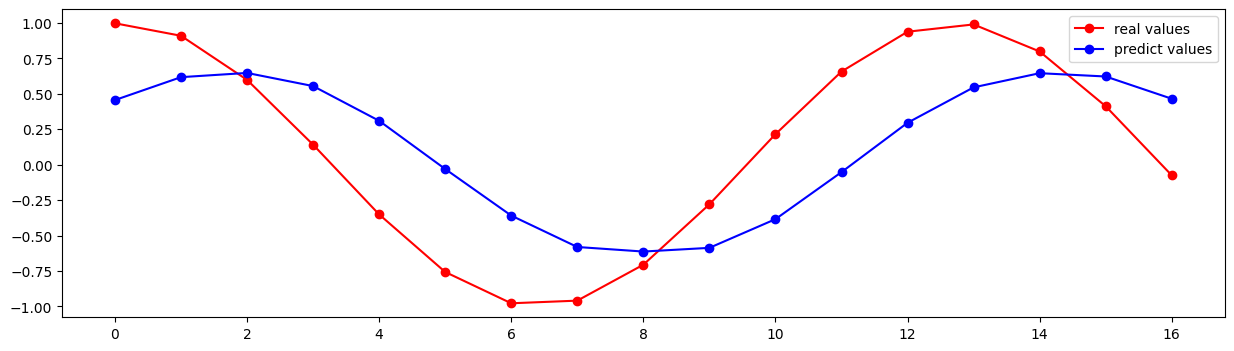

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 4))

plt.plot(data[3:], 'ro-', label='real values') # 실제값

#예측값

plt.plot(model.predict(X), 'bo-', label='predict values')

plt.legend()

plt.show()